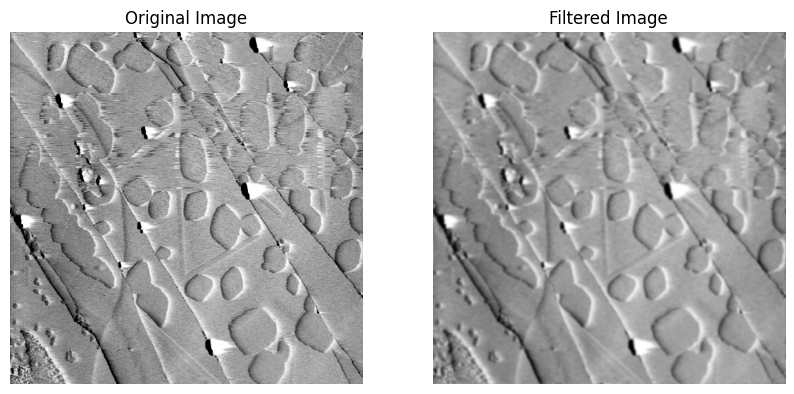

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/1_amplitude.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Fourier transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

# Create a Gaussian kernel for blurring
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
sigma = 60  # adjust this parameter for the level of blurring
gaussian_kernel = np.exp(-(X**2 + Y**2) / (2 * (sigma ** 2)))

# Apply the Gaussian kernel to the Fourier transform
f_shift_filtered = f_shift * gaussian_kernel

# Perform inverse Fourier transform
f_filtered_inverse = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_filtered_inverse)
image_filtered = np.abs(image_filtered)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()


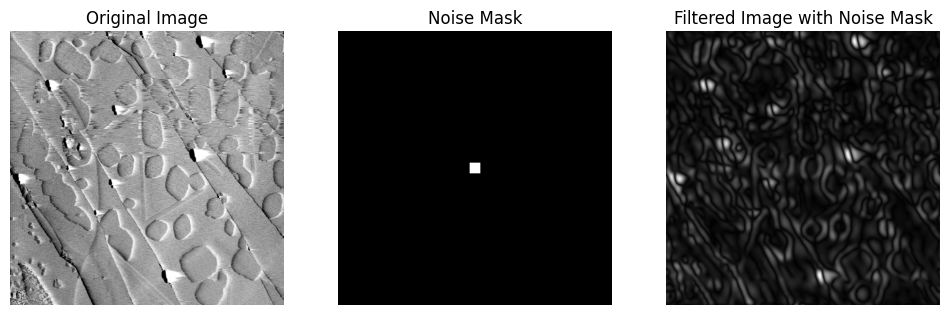

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/1_amplitude.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform Fourier transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

# Create a Gaussian kernel for blurring
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
sigma = 20  # adjust this parameter for the level of blurring
gaussian_kernel = np.exp(-(X**2 + Y**2) / (2 * (sigma ** 2)))

# Create a noise mask to identify noise frequencies
noise_mask = np.zeros((rows, cols), dtype=np.uint8)
noise_mask[int(crow-10):int(crow+10), int(ccol-10):int(ccol+10)] = 1

# Apply the noise mask to the Gaussian kernel
gaussian_kernel = gaussian_kernel * (1 - noise_mask)

# Apply the Gaussian kernel to the Fourier transform
f_shift_filtered = f_shift * gaussian_kernel

# Perform inverse Fourier transform
f_filtered_inverse = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_filtered_inverse)
image_filtered = np.abs(image_filtered)

# Plot the original image, noise mask, and filtered image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noise_mask, cmap='gray')
plt.title('Noise Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image with Noise Mask')
plt.axis('off')

plt.show()


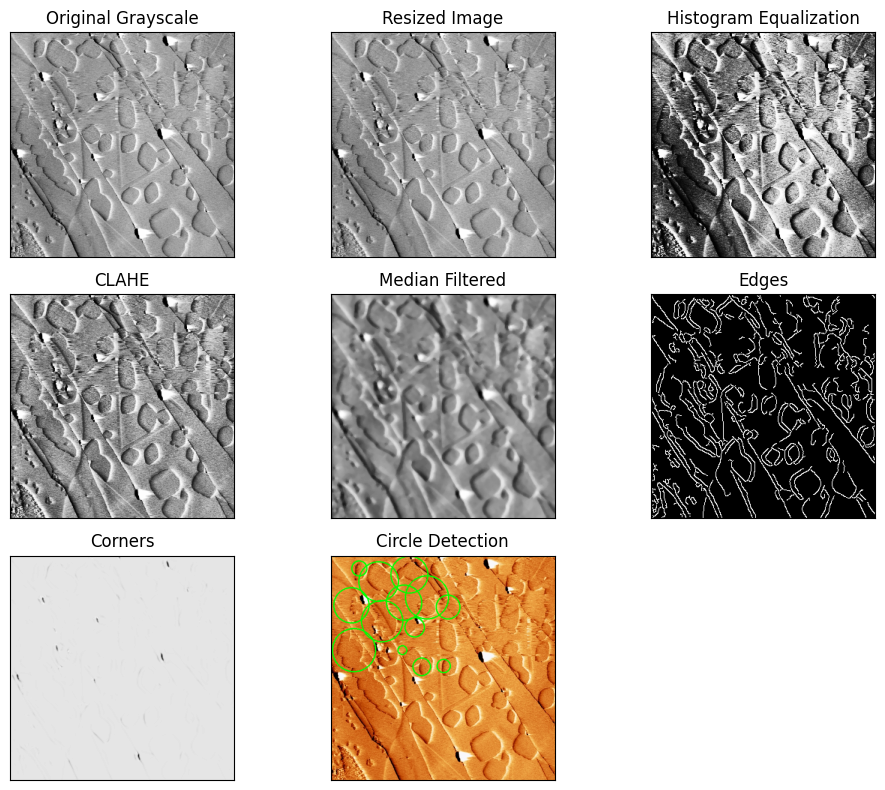

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Loading
image_path = '/content/1_amplitude.jpg'
image = cv2.imread(image_path)

# 2. Preprocessing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (300, 300))  # Example resizing

# 3. Image Enhancement
equalized_image = cv2.equalizeHist(resized_image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(resized_image)

# 4. Noise Reduction
blurred_image = cv2.GaussianBlur(clahe_image, (5, 5), 0)
median_filtered_image = cv2.medianBlur(blurred_image, 5)

# 5. Feature Extraction
edges = cv2.Canny(median_filtered_image, 100, 200)
corners = cv2.cornerHarris(median_filtered_image, 2, 3, 0.04)

# 6. Object Detection and Recognition
# Example: Using Hough Circles for Circle Detection
circles = cv2.HoughCircles(median_filtered_image, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=100, param2=30, minRadius=5, maxRadius=50)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(image, center, radius, (0, 255, 0), 2)

# 7. Post-processing
plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1), plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 2), plt.imshow(resized_image, cmap='gray')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 3), plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalization'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 4), plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 5), plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 6), plt.imshow(edges, cmap='gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 7), plt.imshow(corners, cmap='gray')
plt.title('Corners'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 8), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Circle Detection'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
